# 📊 Día 06 – Análisis estadístico y detección de outliers con Pandas y Seaborn


En este día reforzaremos conceptos estadísticos esenciales para el análisis de datos, y aprenderás a detectar outliers de forma visual y programática. También afianzaremos la limpieza de datos y el uso de Seaborn para visualizaciones más avanzadas.


In [23]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### 1. Crear un DataFrame simulado con valores atípicos

In [24]:

np.random.seed(42)
datos = {
    "producto": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "precio": np.append(np.random.normal(100, 15, 9), 500),  # Último valor es un outlier
    "cantidad": np.random.randint(5, 20, 10)
}
df = pd.DataFrame(datos)
df


,producto,precio,cantidad
0,A,107.450712,16
1,B,97.926035,9
2,C,109.715328,5
3,D,122.845448,16
4,E,96.487699,14
5,F,96.487946,10
6,G,123.688192,17
7,H,111.511521,16
8,I,92.957884,13
9,J,500.000000,5


### 2. Estadísticas básicas y visualización de outliers

           precio   cantidad
count   10.000000  10.000000
mean   145.907077  12.100000
std    124.886361   4.581363
min     92.957884   5.000000
25%     96.847468   9.250000
50%    108.583020  13.500000
75%    120.011966  16.000000
max    500.000000  17.000000


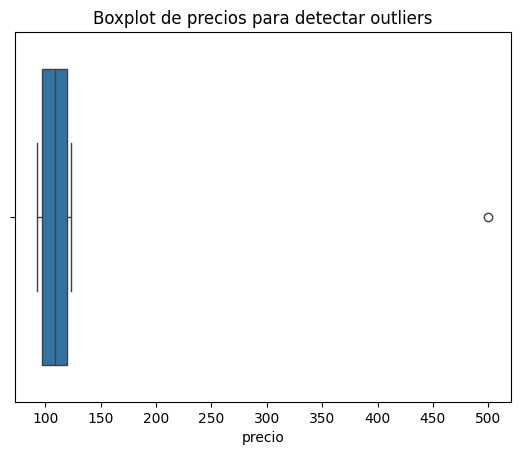

In [25]:

print(df.describe())
sns.boxplot(data=df, x="precio")
plt.title("Boxplot de precios para detectar outliers")
plt.show()


### 3. Detección de outliers usando regla del IQR

In [30]:

Q1 = df["precio"].quantile(0.25)
Q3 = df["precio"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["precio"] < limite_inferior) | (df["precio"] > limite_superior)]
print("Outliers detectados:")
print(outliers)


Outliers detectados:
  producto  precio  cantidad
9        J   500.0         5


### 4. Tratamiento de outliers (reemplazo por media)


--- DataFrame sin outliers ---
  producto      precio  cantidad
0        A  107.450712        16
1        B   97.926035         9
2        C  109.715328         5
3        D  122.845448        16
4        E   96.487699        14
5        F   96.487946        10
6        G  123.688192        17
7        H  111.511521        16
8        I   92.957884        13

--- DataFrame con outliers corregidos (mediana) ---
  producto      precio  cantidad
0        A  107.450712        16
1        B   97.926035         9
2        C  109.715328         5
3        D  122.845448        16
4        E   96.487699        14
5        F   96.487946        10
6        G  123.688192        17
7        H  111.511521        16
8        I   92.957884        13
9        J  108.583020         5


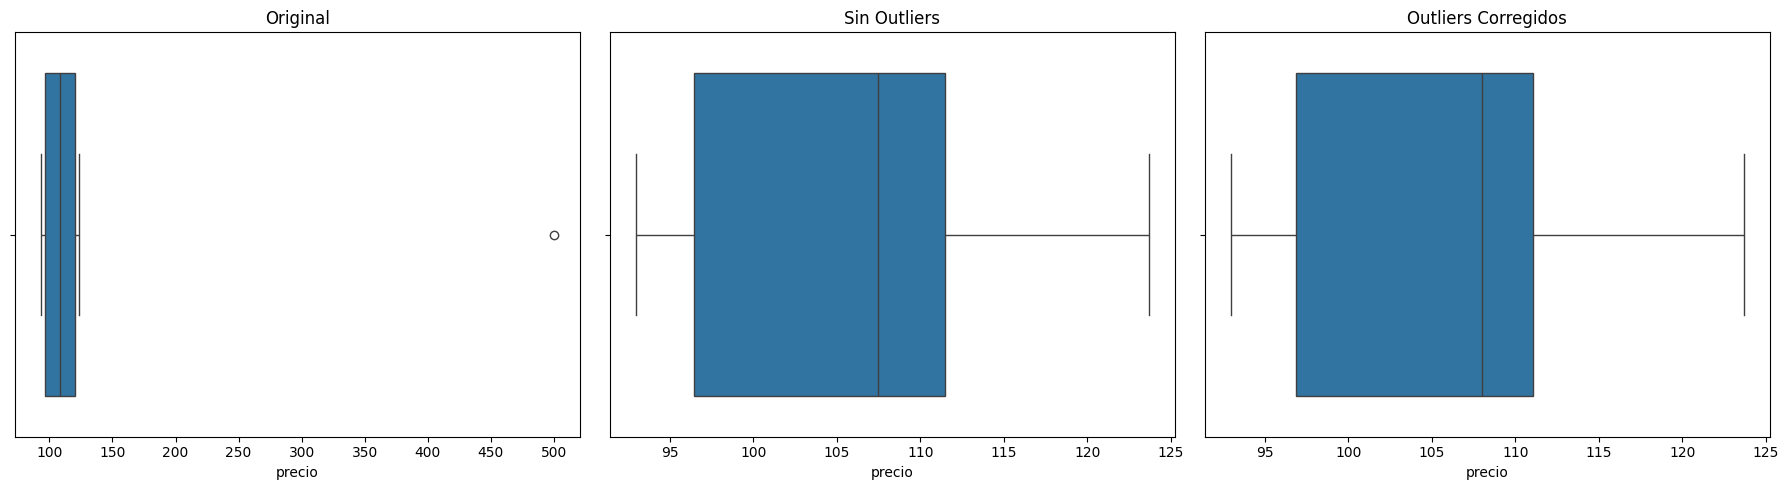

In [37]:
# Paso 4: Tratamiento de outliers (eliminación o corrección)

# Eliminación de outliers del DataFrame
df_sin_outliers = df[(df["precio"] >= limite_inferior) & (df["precio"] <= limite_superior)]
print("\n--- DataFrame sin outliers ---")
print(df_sin_outliers)

# Corrección (opcional): sustituir por la mediana
df_corregido = df.copy()
df_corregido.loc[(df_corregido["precio"] > limite_superior) | (df_corregido["precio"] < limite_inferior), "precio"] = df_corregido["precio"].median()
print("\n--- DataFrame con outliers corregidos (mediana) ---")
print(df_corregido)

# Visual comparativa de los 3 datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, x="precio", ax=axes[0])
axes[0].set_title("Original")
sns.boxplot(data=df_sin_outliers, x="precio", ax=axes[1])
axes[1].set_title("Sin Outliers")
sns.boxplot(data=df_corregido, x="precio", ax=axes[2])
axes[2].set_title("Outliers Corregidos")
plt.tight_layout()
plt.show()


Q1: 89.75948927510207, Q3: 104.05952052012063, IQR: 14.300031245018559
Limites: 68.31 a 125.51

Número de outliers: 6 (10.7%)


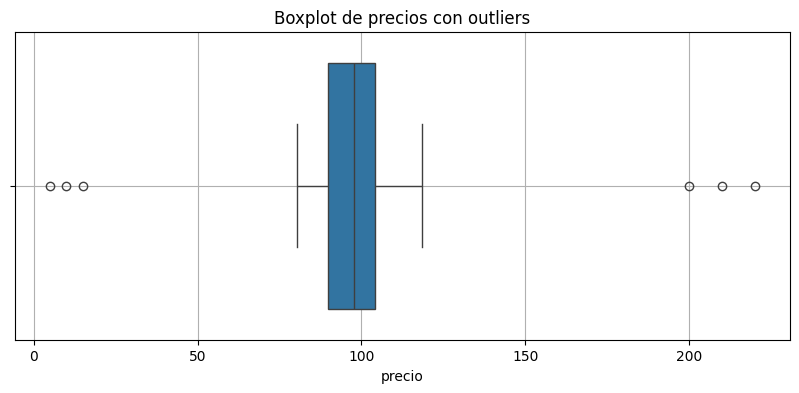

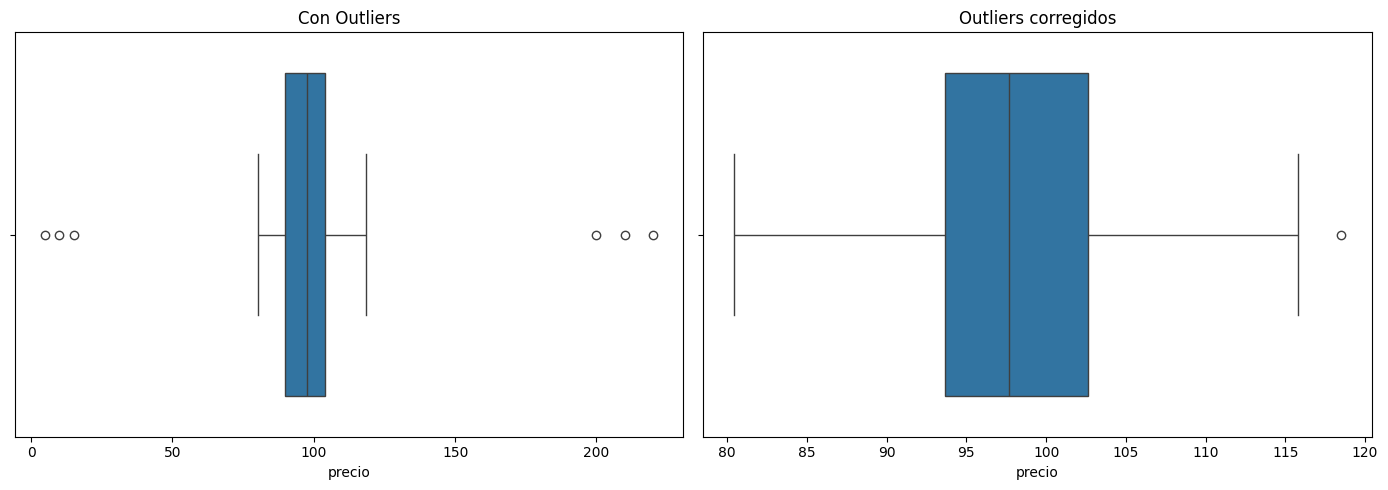

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulamos datos con algunos valores atípicos
np.random.seed(42)
precios_normales = np.random.normal(loc=100, scale=10, size=50)
precios_outliers = [200, 210, 220, 15, 10, 5]
todos_los_precios = np.concatenate([precios_normales, precios_outliers])
#print(f"Precios Normales: {precios_normales}, Precios Outliers: {precios_outliers}, Todos los Precios: {todos_los_precios}")



df = pd.DataFrame({"precio": todos_los_precios})

# 2. Calculamos el rango intercuartil (IQR)
Q1 = df["precio"].quantile(0.25)
Q3 = df["precio"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Limites: {limite_inferior:.2f} a {limite_superior:.2f}")

# 3. Detectamos los outliers
df["es_outlier"] = (df["precio"] < limite_inferior) | (df["precio"] > limite_superior)

# 4. Mostramos cuántos outliers hay
n_outliers = df["es_outlier"].sum()
total = len(df)
porcentaje = (n_outliers / total) * 100
print(f"\nNúmero de outliers: {n_outliers} ({porcentaje:.1f}%)")

# 5. Visualización
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="precio")
plt.title("Boxplot de precios con outliers")
plt.grid(True)
plt.show()

# 6. Corrección: reemplazar outliers con la mediana
df_corregido = df.copy()
mediana = df["precio"].median()
df_corregido.loc[df["es_outlier"], "precio"] = mediana

# 7. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x="precio", ax=axes[0])
axes[0].set_title("Con Outliers")

sns.boxplot(data=df_corregido, x="precio", ax=axes[1])
axes[1].set_title("Outliers corregidos")

plt.tight_layout()
plt.show()

### 5. Exportar CSV limpio a la carpeta `/data/`

In [12]:

df.to_csv("../../data/dia06_outliers_limpio.csv", index=False)
print("Archivo guardado en ../../data/dia06_outliers_limpio.csv")


Archivo guardado en ../../data/dia06_outliers_limpio.csv
